In [21]:
import pandas as pd
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [22]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [23]:
df.shape

(4340, 8)

In [24]:
print(df['seller_type'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']


In [25]:
print(df['transmission'].unique())

['Manual' 'Automatic']


In [26]:
print(df['owner'].unique())

['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [27]:
print(df['fuel'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [28]:
# Check the missing values 
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [29]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [30]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [31]:
final_df = df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]

In [32]:
final_df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [33]:
final_df['number of year'] = 2022-final_df['year']

In [34]:
final_df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,number of year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,15
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,15
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,10
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,5
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [35]:
final_df.drop(['year'], axis = 1, inplace = True)

In [36]:
final_df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,number of year
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [38]:
final_df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,number of year
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [39]:
# One hot encode 
final_df = pd.get_dummies(final_df, drop_first =  True)

In [40]:
final_df.head()

,selling_price,km_driven,number of year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,8,1,0,0,0,1,0,1,0,1,0,0


In [41]:
final_df.corr()

,selling_price,km_driven,number of year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
number of year,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


In [42]:
import seaborn as sns

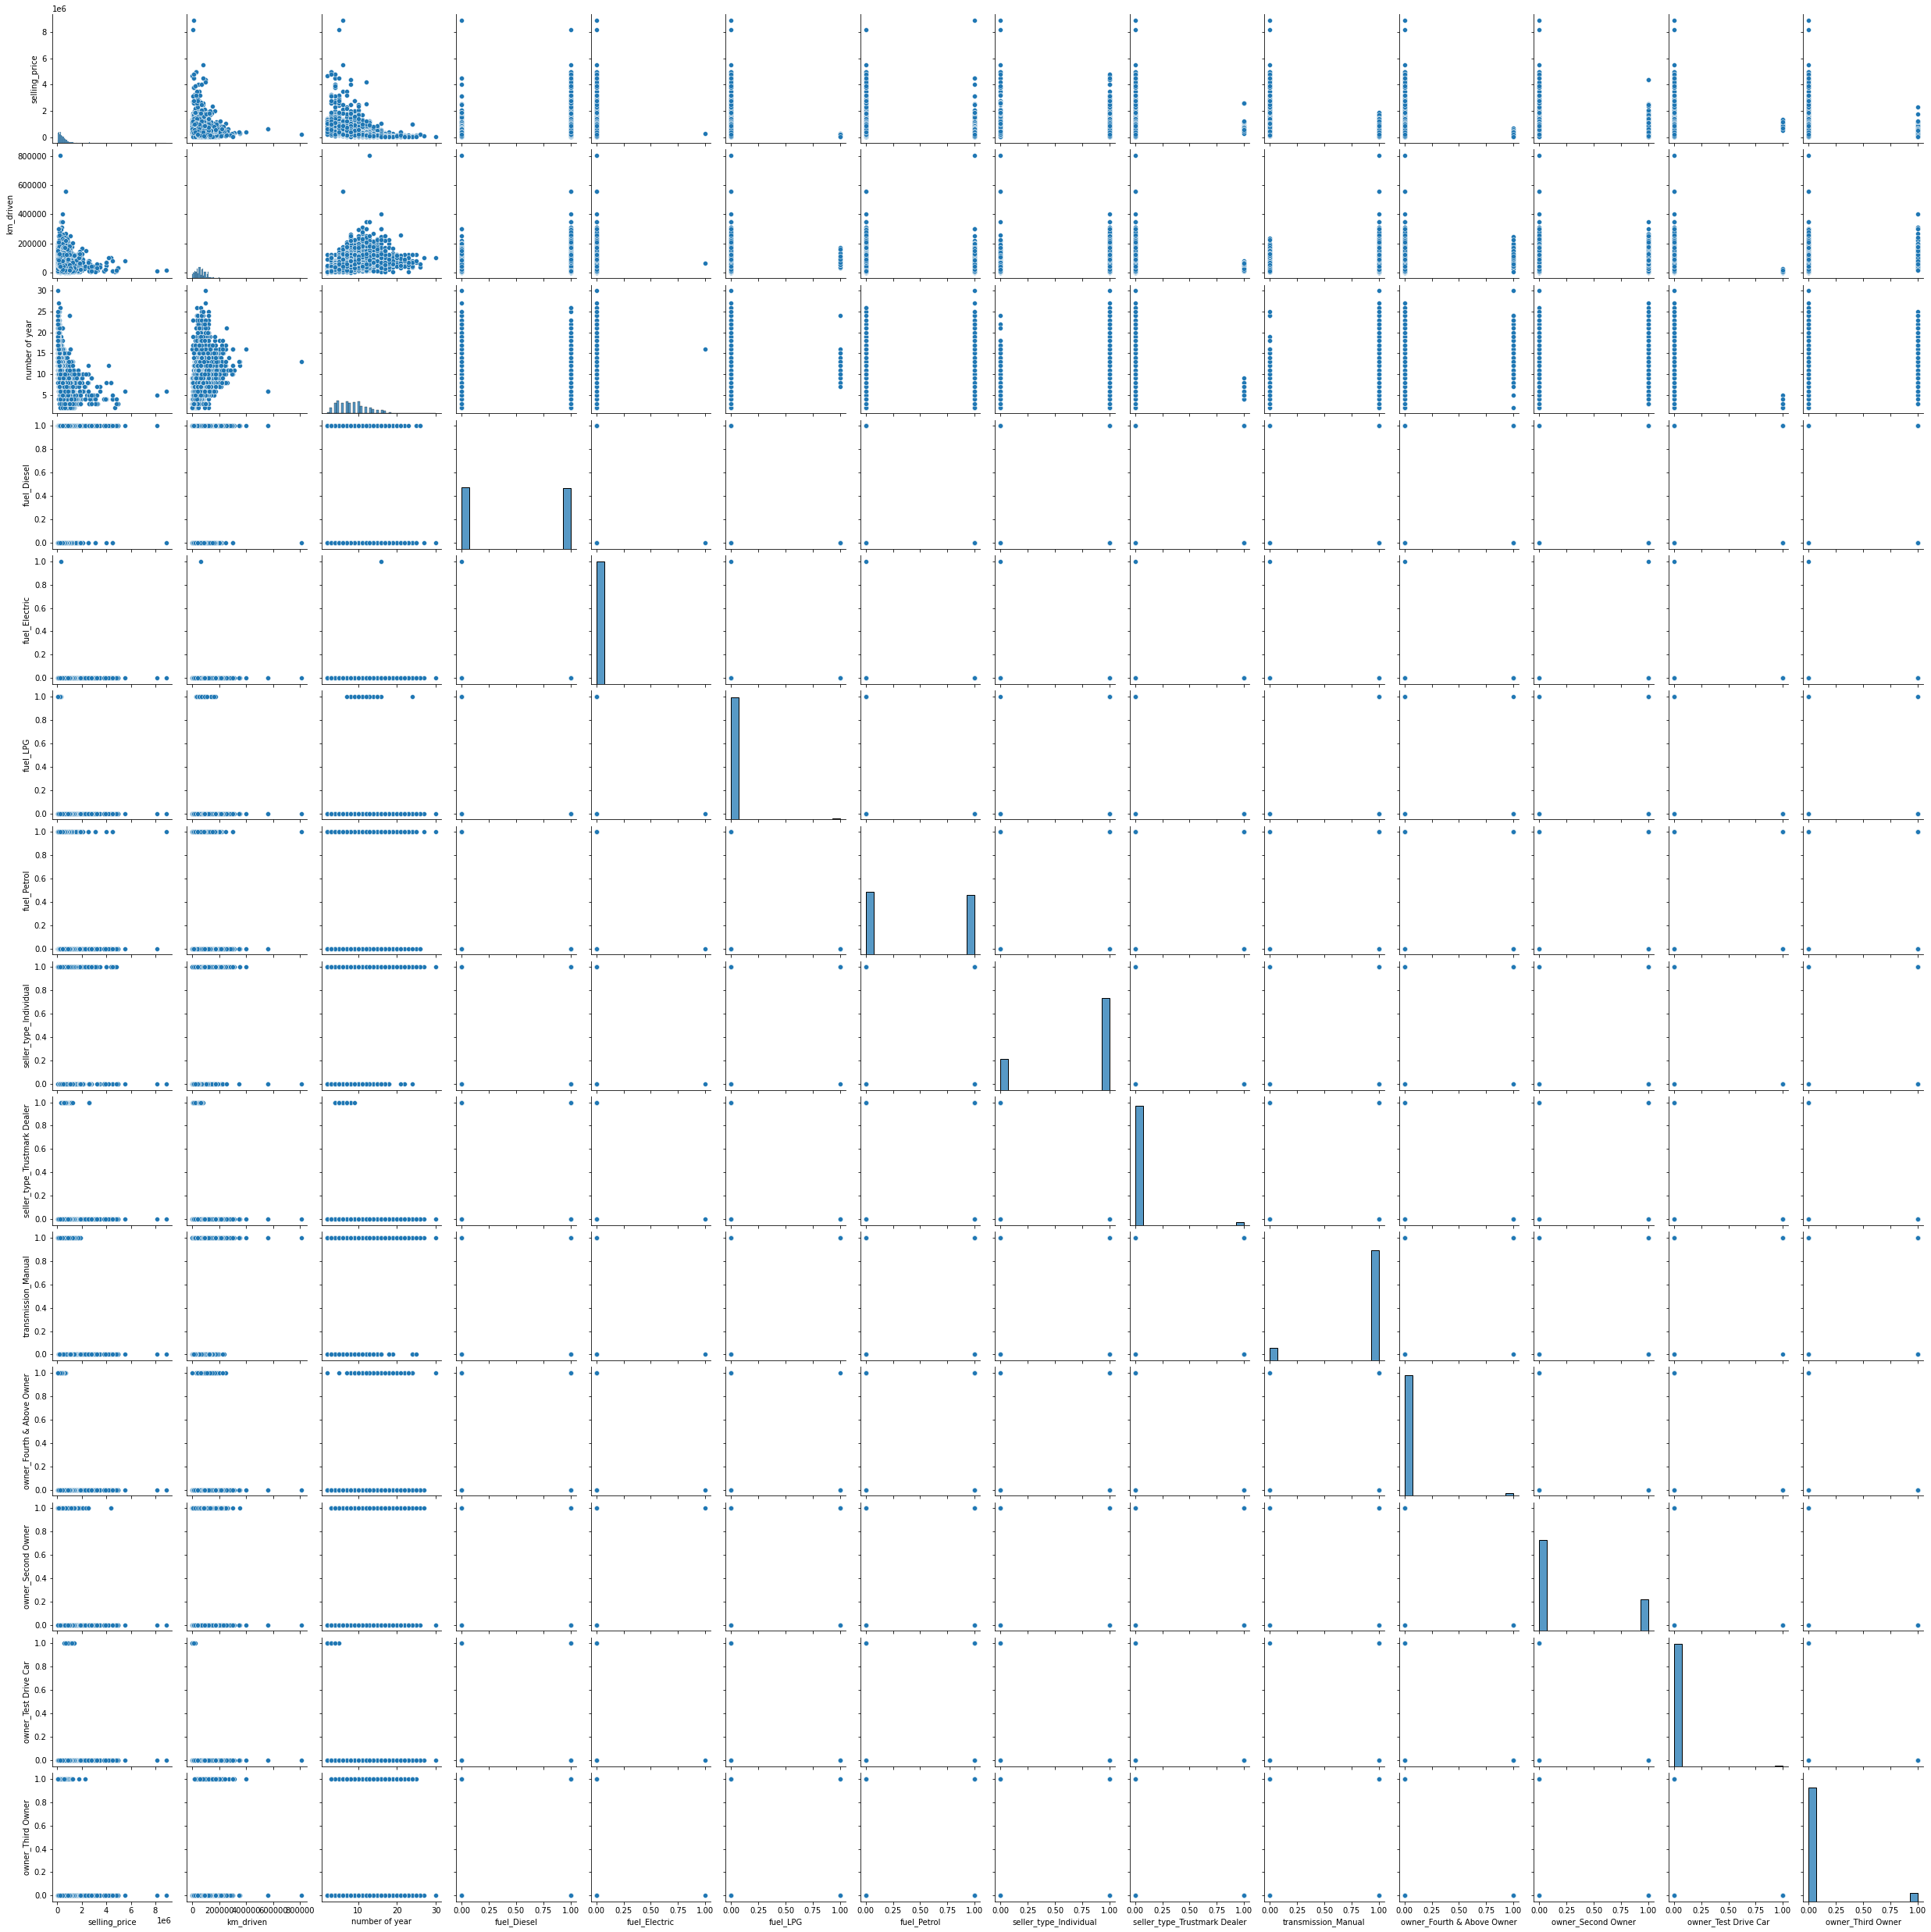

In [43]:
sns.pairplot(final_df)

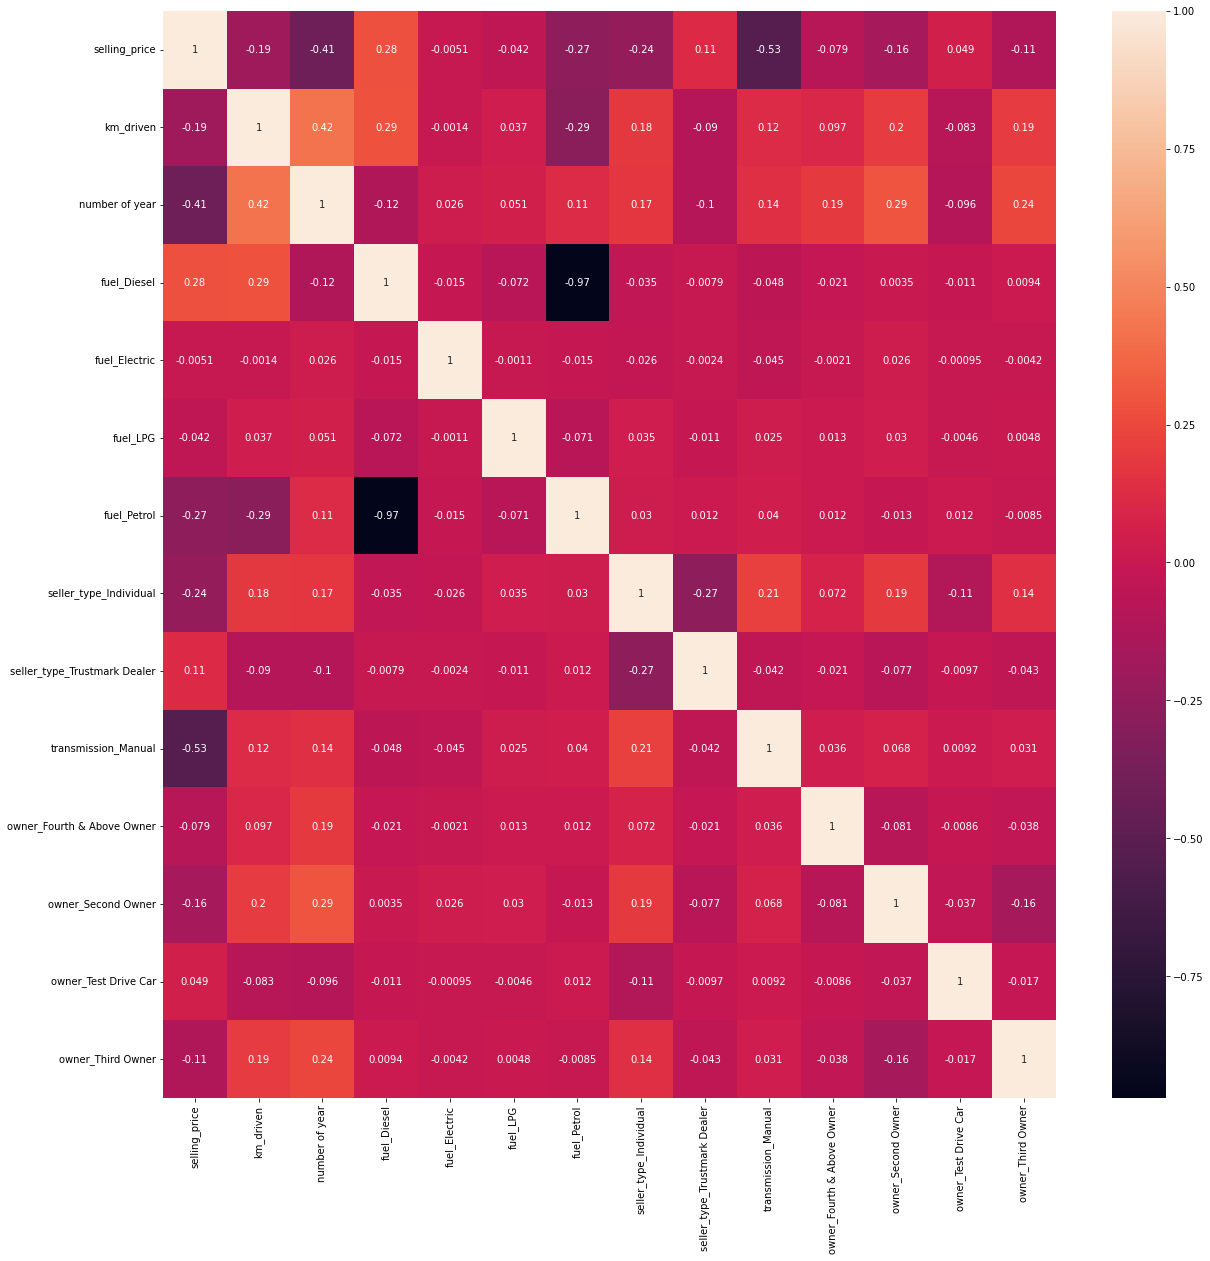

In [44]:
import matplotlib.pyplot as plt
corr_mat = final_df.corr()
top_corr_features = corr_mat.index
plt.figure(figsize = (20,20))
g =  sns.heatmap(final_df[top_corr_features].corr(), annot = True)

In [45]:
final_df.head()

,selling_price,km_driven,number of year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,8,1,0,0,0,1,0,1,0,1,0,0


In [46]:
# defining target and features
X = final_df.iloc[:,1:]
y = final_df.iloc[:,0]


In [47]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [48]:
# Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [49]:
print(model.feature_importances_)

[2.42040009e-01 2.52128141e-01 1.29751663e-01 5.29023196e-05
 2.53897646e-05 2.07036660e-04 4.58139076e-02 8.31807746e-03
 2.92827906e-01 7.47767942e-04 2.30978188e-02 4.71854180e-04
 4.51752658e-03]


<AxesSubplot:>

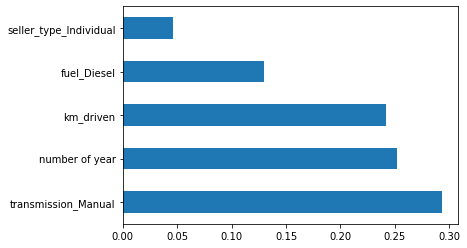

In [50]:
feature_importance = pd.Series(model.feature_importances_ , index =  X.columns)
feature_importance.nlargest(5).plot(kind = 'barh')

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2)

In [53]:
X_train.shape

(3472, 13)

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
RF = RandomForestRegressor()

In [56]:
# hyperparameters
import numpy as np

# number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop = 1200, num = 12)]
# number of features to consider at every split
max_features = ['auto', 'sqrt']
# maximum number of levels in the tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
# max_depth.append (none)
# minimum number of sample required to split a node
min_sample_split = [2,5,15, 100]
# minimum number of sample required at each leaf node
min_sample_leaf = [1,2,5,10]





In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
# Create the random Grid
random_grid = {'n_estimators':n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_sample_split,
              'min_samples_leaf':min_sample_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [59]:
# Use random grid to select the best hyperparameters
# Initializing a random regressor

rf = RandomForestRegressor()

In [60]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv =5, scoring = 'neg_mean_squared_error', n_iter = 10, verbose = 2, random_state = 42, n_jobs = 1, error_score = 'raise')

In [62]:
result = rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   3.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   2.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   2.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   2.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   2.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   4.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   3.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100

In [68]:
result.get_params()

{'cv': 5,
 'error_score': 'raise',
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(),
 'n_iter': 10,
 'n_jobs': 1,
 'param_distributions': {'n_estimators': [100,
   200,
   300,
   400,
   500,
   600,
   700,
   800,
   900,
   1000,
   1100,
   1200],
  'max_features': ['auto', 'sqrt'],
  'max_depth': [5, 10, 15, 20, 25, 30],
  'min_samples_split': [2, 5, 15, 100],
  'min_samples_leaf': [1, 2, 5, 10]},
 'pre_dispatch': '2*n

In [66]:
pd.DataFrame(result.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.383697,0.355336,0.122331,0.031136,900,100,2,auto,15,"{'n_estimators': 900, 'min_samples_split': 100...",-2.549479e+11,-1.582712e+11,-1.280991e+11,-9.827766e+10,-1.044296e+11,-1.488051e+11,5.710837e+10,5
1,3.186961,0.734208,0.167599,0.034158,1100,100,5,auto,20,"{'n_estimators': 1100, 'min_samples_split': 10...",-2.547093e+11,-1.580123e+11,-1.279116e+11,-9.833152e+10,-1.051791e+11,-1.488288e+11,5.689959e+10,6
2,0.432849,0.003886,0.035882,0.000626,300,15,10,sqrt,15,"{'n_estimators': 300, 'min_samples_split': 15,...",-2.511980e+11,-1.562863e+11,-1.158470e+11,-9.783797e+10,-9.545753e+10,-1.433254e+11,5.817214e+10,4
3,0.550464,0.003213,0.046930,0.003389,400,100,5,sqrt,15,"{'n_estimators': 400, 'min_samples_split': 100...",-2.674349e+11,-1.793751e+11,-1.323738e+11,-1.055736e+11,-1.063404e+11,-1.582196e+11,6.083848e+10,8
4,2.005681,0.021774,0.101464,0.000832,700,2,5,auto,25,"{'n_estimators': 700, 'min_samples_split': 2, ...",-2.252282e+11,-1.031070e+11,-9.709317e+10,-9.942243e+10,-8.805464e+10,-1.225811e+11,5.156298e+10,3
5,1.842254,0.011268,0.153174,0.000588,1000,2,2,sqrt,30,"{'n_estimators': 1000, 'min_samples_split': 2,...",-2.148127e+11,-1.085226e+11,-8.847883e+10,-8.283379e+10,-7.901176e+10,-1.147319e+11,5.106343e+10,1
6,2.948787,0.008514,0.148473,0.000865,1100,15,2,auto,10,"{'n_estimators': 1100, 'min_samples_split': 15...",-2.220646e+11,-9.987925e+10,-9.681779e+10,-1.004412e+11,-9.004219e+10,-1.218490e+11,5.024413e+10,2
7,0.751453,0.151130,0.043196,0.009678,300,100,2,auto,20,"{'n_estimators': 300, 'min_samples_split': 100...",-2.549302e+11,-1.583023e+11,-1.282352e+11,-9.895955e+10,-1.046963e+11,-1.490247e+11,5.693116e+10,7
8,0.966168,0.148321,0.072986,0.001864,700,100,5,sqrt,5,"{'n_estimators': 700, 'min_samples_split': 100...",-2.747277e+11,-1.817603e+11,-1.351957e+11,-1.091168e+11,-1.087404e+11,-1.619082e+11,6.236930e+10,10
9,0.960569,0.007032,0.079749,0.001362,700,100,5,sqrt,20,"{'n_estimators': 700, 'min_samples_split': 100...",-2.682043e+11,-1.789873e+11,-1.321157e+11,-1.055724e+11,-1.078700e+11,-1.585499e+11,6.085328e+10,9


In [70]:
prediction = rf_random.predict(X_test)
pd.Series(prediction)

0      221091.336891
1      217463.705194
2      395617.572765
3      668892.638813
4      189358.157668
           ...      
863    212268.756561
864    958671.309827
865    322530.740602
866    438976.689464
867    233355.907971
Length: 868, dtype: float64

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

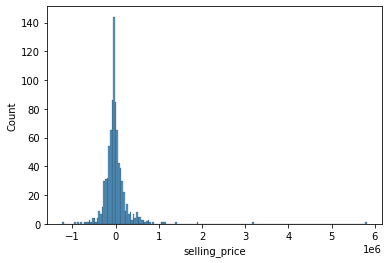

In [71]:
sns.histplot(y_test-prediction)

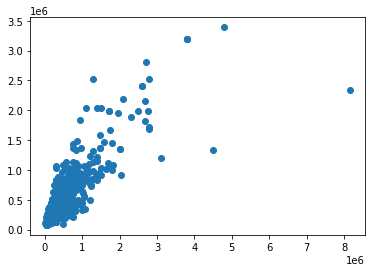

In [74]:
plt.scatter(y_test, prediction)

In [75]:
## Deployment

import pickle 

# open a file where you want to store the data
file = open('randomforest_regressionmodel.plk', 'wb')
 # drop (dump) information to that file
    
pickle.dump(rf_random, file)

In [42]:
rf_random.fit(X_train, y_train)

NameError: name 'rf_random' is not defined